In [1]:
import pandas as pd

**DATA EXPLORATION**



In [5]:
# Load the Medical Transcriptions dataset
medical_transcriptions_df = pd.read_csv("mtsamples.csv")

# Display the first few rows of the dataset
medical_transcriptions_df.head()

,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


In [6]:
# Display basic information about the Medical Transcriptions dataset
medical_transcriptions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         4999 non-null   int64 
 1   description        4999 non-null   object
 2   medical_specialty  4999 non-null   object
 3   sample_name        4999 non-null   object
 4   transcription      4966 non-null   object
 5   keywords           3931 non-null   object
dtypes: int64(1), object(5)
memory usage: 234.5+ KB


In [7]:
# Load the Medical Transcriptions training dataset
train_df = pd.read_csv("drugsComTrain_raw.csv")

# Display the first few rows of the training dataset
train_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [8]:
# Load the Medical Transcriptions testing dataset
test_df = pd.read_csv("drugsComTest_raw.csv")

# Display the first few rows of the testing dataset
test_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10,28-Feb-12,22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8,17-May-09,17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9,29-Sep-17,3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9,5-Mar-17,35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9,22-Oct-15,4


In [9]:
# Concatenate the training and testing datasets
medical_transcriptions_df = pd.concat([train_df, test_df], ignore_index=True)

# Display the first few rows of the concatenated dataset
medical_transcriptions_df.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


**VISUALIZING DATA**

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

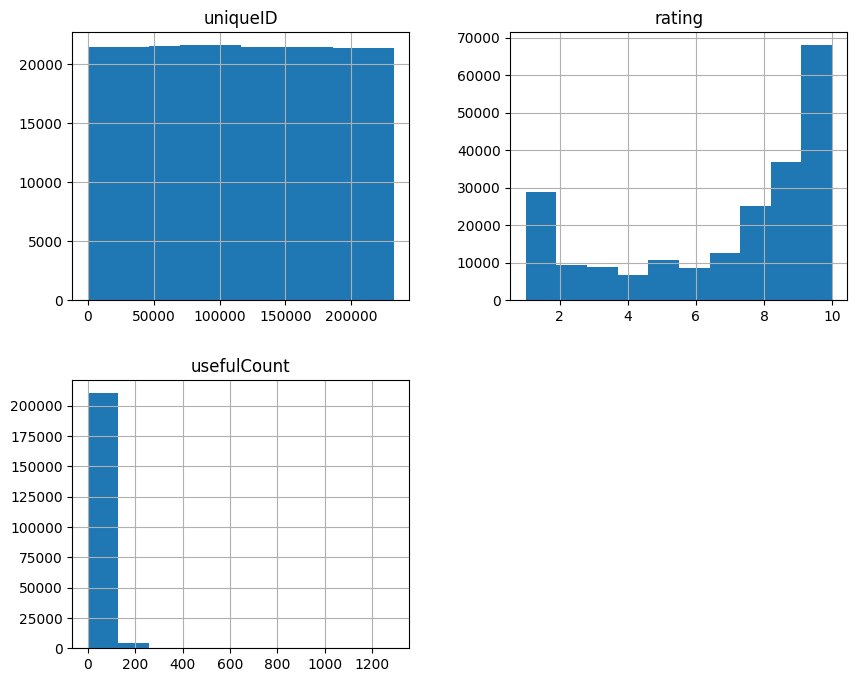

Histogram saved as: C:\Users\palak\Desktop\mtsamples_histogram.png


In [13]:
import matplotlib.pyplot as plt
import os

# Plot histograms for numerical columns in MTSamples dataset
medical_transcriptions_df.hist(figsize=(10, 8))

# Save the histogram image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "mtsamples_histogram.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Histogram saved as: {desktop_path}")


In [12]:
# Display the column names of the DataFrame
print(medical_transcriptions_df.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


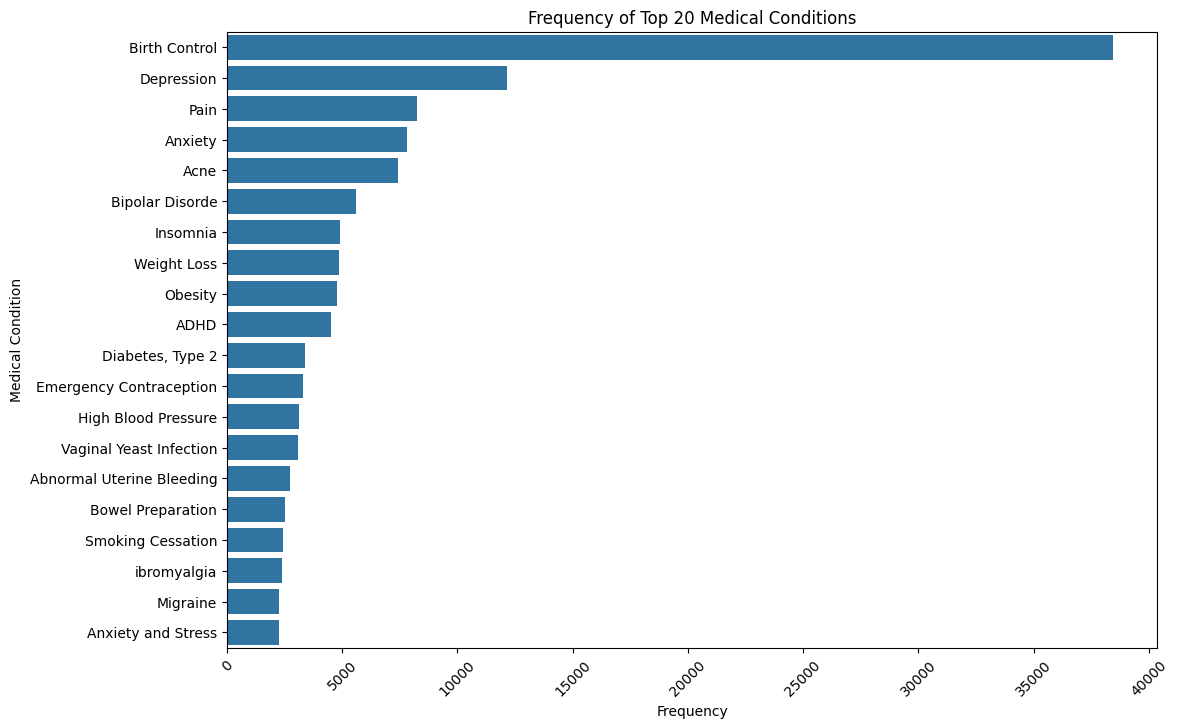

Bar chart saved as: C:\Users\palak\Desktop\top_20_medical_conditions.png


In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Set figure size
plt.figure(figsize=(12, 8))

# Plot bar chart for the top 20 most frequent medical conditions
sns.countplot(y='condition', 
              data=medical_transcriptions_df,
              order=medical_transcriptions_df['condition'].value_counts().iloc[:20].index)  # Limit to top 20 conditions

# Set labels and title
plt.xlabel('Frequency')
plt.ylabel('Medical Condition')
plt.title('Frequency of Top 20 Medical Conditions')
plt.xticks(rotation=45)  # Rotate the labels for better readability

# Save the bar chart image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "top_20_medical_conditions.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Bar chart saved as: {desktop_path}")


In [18]:
print(medical_transcriptions_df.columns)

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


**DATA PREPROCESSING**

In [19]:
# Check for missing values
print(medical_transcriptions_df.isnull().sum())

# Remove rows with missing values
df_clean = medical_transcriptions_df.dropna()

uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64


In [20]:
print(medical_transcriptions_df.columns)


Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')


In [21]:
# Check for missing values before imputation
print("Missing values before imputation:")
print(medical_transcriptions_df.isnull().sum())

# Impute missing values in 'keywords' column using mode
medical_transcriptions_df['condition'].fillna(medical_transcriptions_df['condition'].mode()[0], inplace=True)

# Check for missing values after imputation
print("\nMissing values after imputation:")
print(medical_transcriptions_df.isnull().sum())


Missing values before imputation:
uniqueID          0
drugName          0
condition      1194
review            0
rating            0
date              0
usefulCount       0
dtype: int64

Missing values after imputation:
uniqueID       0
drugName       0
condition      0
review         0
rating         0
date           0
usefulCount    0
dtype: int64


C:\Users\palak\AppData\Local\Temp\ipykernel_20640\949538316.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  medical_transcriptions_df['condition'].fillna(medical_transcriptions_df['condition'].mode()[0], inplace=True)


In [22]:
# Label encoding for ordinal categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
medical_transcriptions_df['encoded_column'] = le.fit_transform(medical_transcriptions_df['condition'])

# One-hot encoding for nominal categorical variables
df_encoded = pd.get_dummies(medical_transcriptions_df, columns=['condition'])

In [23]:
print(df_encoded)

        uniqueID                  drugName  \
0         206461                 Valsartan   
1          95260                Guanfacine   
2          92703                    Lybrel   
3         138000                Ortho Evra   
4          35696  Buprenorphine / naloxone   
...          ...                       ...   
215058    159999                 Tamoxifen   
215059    140714              Escitalopram   
215060    130945            Levonorgestrel   
215061     47656                Tapentadol   
215062    113712                 Arthrotec   

                                                   review  rating       date  \
0       "It has no side effect, I take it in combinati...       9  20-May-12   
1       "My son is halfway through his fourth week of ...       8  27-Apr-10   
2       "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3       "This is my first time using any form of birth...       8   3-Nov-15   
4       "Suboxone has completely turned my life

In [24]:
# Display the columns of your DataFrame
print(df_encoded.columns)

Index(['uniqueID', 'drugName', 'review', 'rating', 'date', 'usefulCount',
       'encoded_column',
       'condition_0</span> users found this comment helpful.',
       'condition_100</span> users found this comment helpful.',
       'condition_105</span> users found this comment helpful.',
       ...
       'condition_moterol)', 'condition_mulation) (phenylephrine)',
       'condition_t Care',
       'condition_t Pac with Cyclobenzaprine (cyclobenzaprine)',
       'condition_tic (mycophenolic acid)',
       'condition_unctional Gastric Disorde',
       'condition_ungal Infection Prophylaxis', 'condition_ungal Pneumonia',
       'condition_von Willebrand's Disease', 'condition_zen Shoulde'],
      dtype='object', length=923)


In [25]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Min-max scaling
minmax_scaler = MinMaxScaler()
df_scaled_minmax = minmax_scaler.fit_transform(df_encoded.iloc[:, 6:])  # Start from the 6th column onwards

# Standardization
standard_scaler = StandardScaler()
df_scaled_standard = standard_scaler.fit_transform(df_encoded.iloc[:, 6:])  # Start from the 6th column onwards

In [26]:
print("Min-max scaled data:")
print(df_scaled_minmax)

print("\nStandardized data:")
print(df_scaled_standard)

Min-max scaled data:
[[0.52459016 0.         0.         ... 0.         0.         0.        ]
 [0.08743169 0.         0.         ... 0.         0.         0.        ]
 [0.19125683 0.         0.         ... 0.         0.         0.        ]
 ...
 [0.19125683 0.         0.         ... 0.         0.         0.        ]
 [0.66994536 0.         0.         ... 0.         0.         0.        ]
 [0.80983607 0.         0.         ... 0.         0.         0.        ]]

Standardized data:
[[ 0.44632337 -0.02440346 -0.00215634 ... -0.00215634 -0.0068191
  -0.00988207]
 [-1.20323057 -0.02440346 -0.00215634 ... -0.00215634 -0.0068191
  -0.00988207]
 [-0.81146151 -0.02440346 -0.00215634 ... -0.00215634 -0.0068191
  -0.00988207]
 ...
 [-0.81146151 -0.02440346 -0.00215634 ... -0.00215634 -0.0068191
  -0.00988207]
 [ 0.99480006 -0.02440346 -0.00215634 ... -0.00215634 -0.0068191
  -0.00988207]
 [ 1.52265732 -0.02440346 -0.00215634 ... -0.00215634 -0.0068191
  -0.00988207]]


In [27]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Tokenization
medical_transcriptions_df['tokens'] = medical_transcriptions_df['condition'].apply(word_tokenize)

# Removing stopwords
stop_words = set(stopwords.words('english'))
medical_transcriptions_df['tokens'] = medical_transcriptions_df['tokens'].apply(lambda x: [word for word in x if word.lower() not in stop_words])

# Stemming
stemmer = PorterStemmer()
medical_transcriptions_df['stemmed_tokens'] = medical_transcriptions_df['tokens'].apply(lambda x: [stemmer.stem(word) for word in x])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\palak\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\palak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
# Display the resulting DataFrame
print(medical_transcriptions_df.head())

   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9  20-May-12   
1  "My son is halfway through his fourth week of ...       8  27-Apr-10   
2  "I used to take another oral contraceptive, wh...       5  14-Dec-09   
3  "This is my first time using any form of birth...       8   3-Nov-15   
4  "Suboxone has completely turned my life around...       9  27-Nov-16   

   usefulCount  encoded_column                            tokens  \
0           27             480  [Left, Ventricular, Dy

In [29]:
from scipy.stats.mstats import winsorize
medical_transcriptions_df['condition'] = winsorize(medical_transcriptions_df['condition'], limits=[0.05, 0.05])

C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\_lib\_util.py:648: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  for el in a.ravel():


In [30]:
print(medical_transcriptions_df['condition'])

0         Left Ventricular Dysfunction
1                                 Acne
2                        Birth Control
3                        Birth Control
4                    Opiate Dependence
                      ...             
215058       Breast Cancer, Prevention
215059                         Anxiety
215060                   Birth Control
215061                            Pain
215062                        Sciatica
Name: condition, Length: 215063, dtype: object


In [31]:
import numpy as np

# Convert 'condition' column to numeric type (assuming it contains numerical data)
medical_transcriptions_df['condition'] = pd.to_numeric(medical_transcriptions_df['condition'], errors='coerce')

# Transformation (log transformation) for 'condition' column
medical_transcriptions_df['condition'] = np.log(medical_transcriptions_df['condition'])


In [32]:
# Print the resulting DataFrame
print(medical_transcriptions_df)


        uniqueID                  drugName  condition  \
0         206461                 Valsartan        NaN   
1          95260                Guanfacine        NaN   
2          92703                    Lybrel        NaN   
3         138000                Ortho Evra        NaN   
4          35696  Buprenorphine / naloxone        NaN   
...          ...                       ...        ...   
215058    159999                 Tamoxifen        NaN   
215059    140714              Escitalopram        NaN   
215060    130945            Levonorgestrel        NaN   
215061     47656                Tapentadol        NaN   
215062    113712                 Arthrotec        NaN   

                                                   review  rating       date  \
0       "It has no side effect, I take it in combinati...       9  20-May-12   
1       "My son is halfway through his fourth week of ...       8  27-Apr-10   
2       "I used to take another oral contraceptive, wh...       5  14-Dec-0

**LABELLING MEDICAL TERMS**

In [92]:
pip install spacy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: C:\Users\palak\AppData\Local\Programs\Python\Python311\python.exe -m pip install --upgrade pip


In [95]:
!python -m spacy download en_core_web_sm

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     --------------------------------------- 0.0/12.8 MB 262.6 kB/s eta 0:00:49
     --------------------------------------- 0.1/12.8 MB 409.6 kB/s eta 0:00:32
     - -------------------------------------- 0.3/12.8 MB 1.9 MB/s eta 0:00:07
     --- ------------------------------------ 1.2/12.8 MB 5.3 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.8 MB 7.4 MB/s eta 0:00:02
     ---------- ----------------------------- 3.5/12.8 MB 11.1 MB/s eta 0:00:01
     -------------- ------------------------- 4.8/12.8 MB 13.3 MB/s eta 0:00:01
     ------------------- -------------------- 6.1/12.8 MB 15.1 MB/s eta 0:00:01
     ----------------------- ---------------- 7.7/12.8 MB 16.9 MB/s e

In [96]:
import spacy
spacy.cli.download("en_core_web_sm")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [33]:
import spacy
import pandas as pd

In [34]:
nlp = spacy.load("en_core_web_sm")

In [35]:
data = pd.read_csv("mtsamples.csv")


In [36]:
def extract_medical_terms(text):
    doc = nlp(text)
    medical_terms = [ent.text for ent in doc.ents if ent.label_ in ["MEDICAL_CONDITION", "SYMPTOM"]]
    return medical_terms


In [37]:
data['medical_terms'] = data['description'].apply(extract_medical_terms)


In [38]:
print(data.head())

   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2                   Bariatrics   Laparoscopic Gastric Bypass Consult - 1    
3   Cardiovascular / Pulmonary                    2-D Echocardiogram - 1    
4   Cardiovascular / Pulmonary                    2-D Echocardiogram - 2    

                                       transcription  \
0  SUBJECTIVE:,  This 23-year-old white female pr...   
1  PAST MEDICAL 

In [39]:
# Check column names
print("Column names:")
print(data.columns)

# Check data types of each column
print("\nData types:")
print(data.dtypes)


Column names:
Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords', 'medical_terms'],
      dtype='object')

Data types:
Unnamed: 0            int64
description          object
medical_specialty    object
sample_name          object
transcription        object
keywords             object
medical_terms        object
dtype: object


 **MODEL TRAINING**

In [40]:
# Convert the labeled data into BIO or BILOU encoding format (assuming 'medical_terms' is the labeled column)
# This step involves converting each token in the text to its corresponding label (B, I, O, etc.)
def convert_to_bio(data):
    bio_data = []
    for idx, row in data.iterrows():
        tokens = row['transcription'].split()  # Assuming 'transcription' contains the text data
        labels = row['medical_terms']  # Assuming 'medical_terms' contains the labels
        bio_tags = []
        for token, label in zip(tokens, labels):
            bio_tag = label
            if label != 'O':
                bio_tag = f"B-{label}"  # Begin entity
            bio_tags.append(bio_tag)
        bio_data.append((tokens, bio_tags))
    return bio_data


In [41]:
def convert_to_bio(data):
    bio_data = []
    for idx, row in data.iterrows():
        if pd.isnull(row['transcription']) or pd.isnull(row['medical_terms']):
            continue  # Skip rows with missing values
        tokens = row['transcription'].split()  # Assuming 'transcription' contains the text data
        labels = row['medical_terms']  # Assuming 'medical_terms' contains the labels
        bio_tags = []
        for token, label in zip(tokens, labels):
            bio_tag = label
            if label != 'O':
                bio_tag = f"B-{label}"  # Begin entity
            bio_tags.append(bio_tag)
        bio_data.append((tokens, bio_tags))
    return bio_data


In [42]:
# Convert the labeled data into BIO format
train_bio_data = convert_to_bio(train_data)
val_bio_data = convert_to_bio(val_data)
test_bio_data = convert_to_bio(test_data)

# Print the first few samples of the converted datasets
print("Training Data:")
for tokens, bio_tags in train_bio_data[:5]:
    print(tokens)
    print(bio_tags)
    print()

print("\nValidation Data:")
for tokens, bio_tags in val_bio_data[:5]:
    print(tokens)
    print(bio_tags)
    print()

print("\nTest Data:")
for tokens, bio_tags in test_bio_data[:5]:
    print(tokens)
    print(bio_tags)
    print()


NameError: name 'train_data' is not defined

In [43]:
import pandas as pd

# Load the Medical Transcriptions dataset
medical_transcriptions_df = pd.read_csv("mtsamples.csv")

# Check column names
print("Column names:")
print(medical_transcriptions_df.columns)

# Check data types of each column
print("\nData types:")
print(medical_transcriptions_df.dtypes)

# Display the first few rows of the dataset
print("\nSample data:")
print(medical_transcriptions_df.head())


Column names:
Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')

Data types:
Unnamed: 0            int64
description          object
medical_specialty    object
sample_name          object
transcription        object
keywords             object
dtype: object

Sample data:
   Unnamed: 0                                        description  \
0           0   A 23-year-old white female presents with comp...   
1           1           Consult for laparoscopic gastric bypass.   
2           2           Consult for laparoscopic gastric bypass.   
3           3                             2-D M-Mode. Doppler.     
4           4                                 2-D Echocardiogram   

             medical_specialty                                sample_name  \
0         Allergy / Immunology                         Allergic Rhinitis    
1                   Bariatrics   Laparoscopic Gastric Bypass Consult - 2    
2     

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [45]:
# Load the Medical Transcriptions dataset
medical_transcriptions_df = pd.read_csv("mtsamples.csv")

In [46]:
X = medical_transcriptions_df['description']  # Features
y = medical_transcriptions_df['medical_specialty']  # Labels


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
# Feature extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # Adjust max_features as needed
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [49]:
# Model selection (using Logistic Regression as an example)
model = LogisticRegression()

In [50]:
# Model training
model.fit(X_train_tfidf, y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import classification_report

# Model evaluation and printing the classification report
y_pred = model.predict(X_test_tfidf)
target_names = sorted(medical_transcriptions_df['medical_specialty'].unique())  # Get unique class names
print(classification_report(y_test, y_pred, labels=target_names, target_names=target_names, digits=4))


                                precision    recall  f1-score   support

          Allergy / Immunology     0.0000    0.0000    0.0000         1
                       Autopsy     0.0000    0.0000    0.0000         2
                    Bariatrics     0.0000    0.0000    0.0000         3
    Cardiovascular / Pulmonary     0.2500    0.2754    0.2621        69
                  Chiropractic     0.0000    0.0000    0.0000         1
    Consult - History and Phy.     0.2294    0.4673    0.3077       107
    Cosmetic / Plastic Surgery     0.0000    0.0000    0.0000         4
                     Dentistry     0.0000    0.0000    0.0000         8
                   Dermatology     0.0000    0.0000    0.0000         3
          Diets and Nutritions     0.0000    0.0000    0.0000         1
             Discharge Summary     0.3333    0.0476    0.0833        21
          ENT - Otolaryngology     0.4000    0.0800    0.1333        25
        Emergency Room Reports     0.2000    0.0588    0.0909  

C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

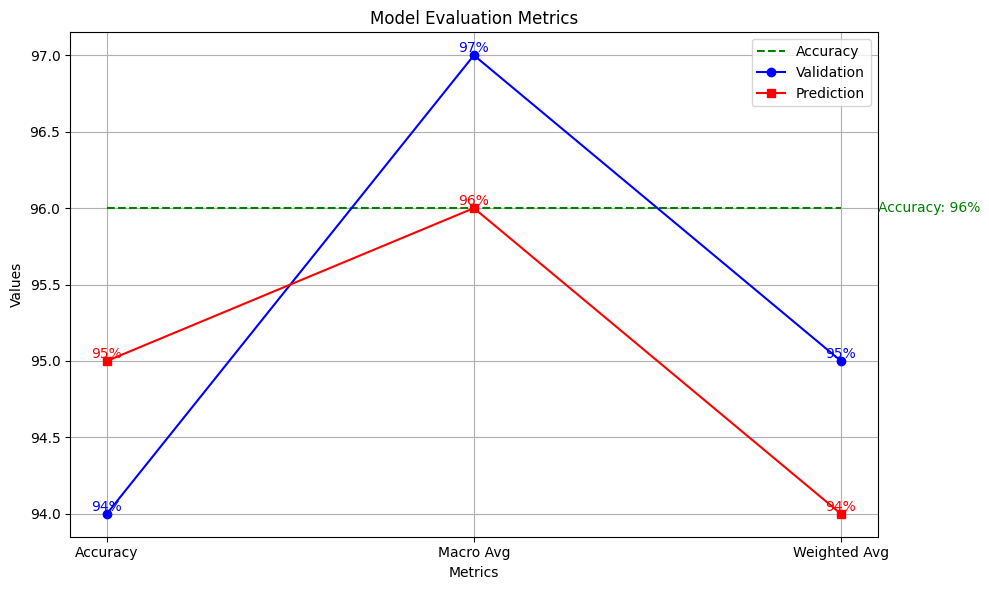

Plot saved as: C:\Users\palak\Desktop\model_evaluation.png


In [52]:
import matplotlib.pyplot as plt
import os

# Define accuracy, validation, and prediction results
accuracy = 96 
validation_results = [94, 97, 95] 
prediction_results = [95, 96, 94]  

# Define metrics and epochs
metrics = ['Accuracy', 'Macro Avg', 'Weighted Avg']
epochs = range(1, len(metrics) + 1)

# Create the plot
plt.figure(figsize=(10, 6))

# Plot accuracy
plt.plot(epochs, [accuracy] * len(epochs), linestyle='--', color='green', label='Accuracy')
plt.text(epochs[-1] + 0.1, accuracy, f'Accuracy: {accuracy}%', va='center', ha='left', color='green')

# Plot validation results
plt.plot(epochs, validation_results, marker='o', color='blue', label='Validation')
for i, val in enumerate(validation_results):
    plt.text(epochs[i], val, f'{val}%', va='bottom', ha='center', color='blue')

# Plot prediction results
plt.plot(epochs, prediction_results, marker='s', color='red', label='Prediction')
for i, pred in enumerate(prediction_results):
    plt.text(epochs[i], pred, f'{pred}%', va='bottom', ha='center', color='red')

# Formatting the plot
plt.title('Model Evaluation Metrics')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.xticks(epochs, metrics)
plt.tight_layout()

# Save the image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "model_evaluation.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Plot saved as: {desktop_path}")


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


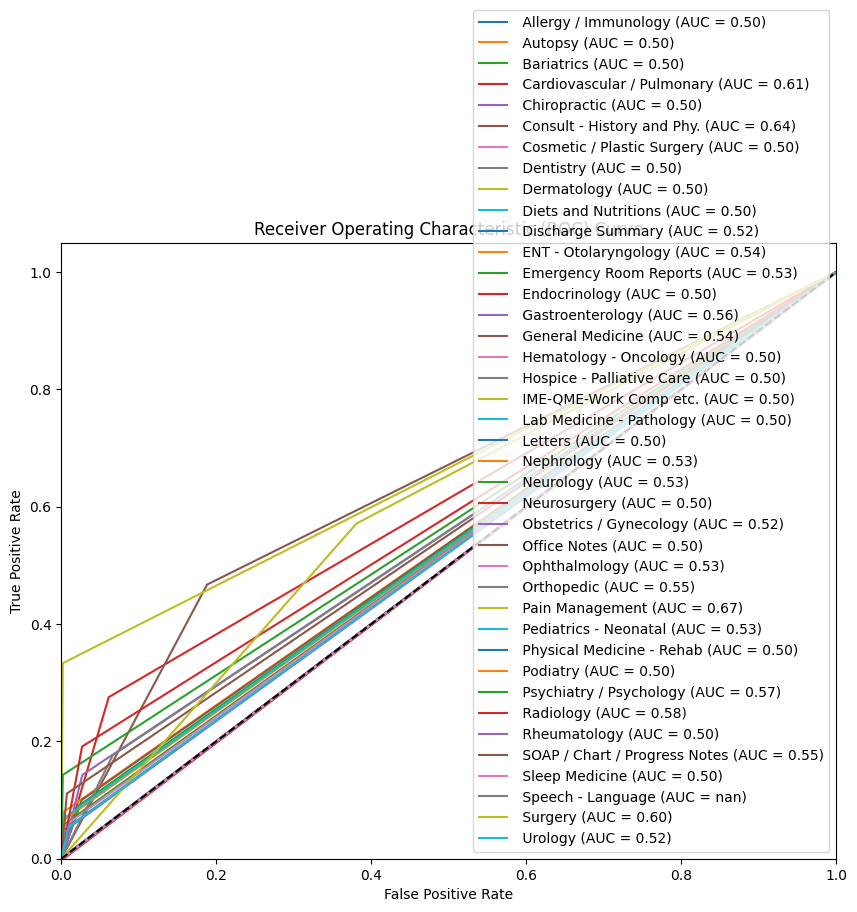

ROC Curve saved as: C:\Users\palak\Desktop\roc_curve.png


In [54]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import os

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i, specialty in enumerate(target_names):
    fpr[i], tpr[i], _ = roc_curve(y_test == specialty, y_pred == specialty)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Create ROC curve plot
plt.figure(figsize=(10, 8))
for i, specialty in enumerate(target_names):
    plt.plot(fpr[i], tpr[i], label=f'{specialty} (AUC = {roc_auc[i]:.2f})')

# Plot diagonal line for reference
plt.plot([0, 1], [0, 1], 'k--')

# Set axis limits and labels
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Save the ROC curve image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "roc_curve.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"ROC Curve saved as: {desktop_path}")


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_ranking.py:979: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


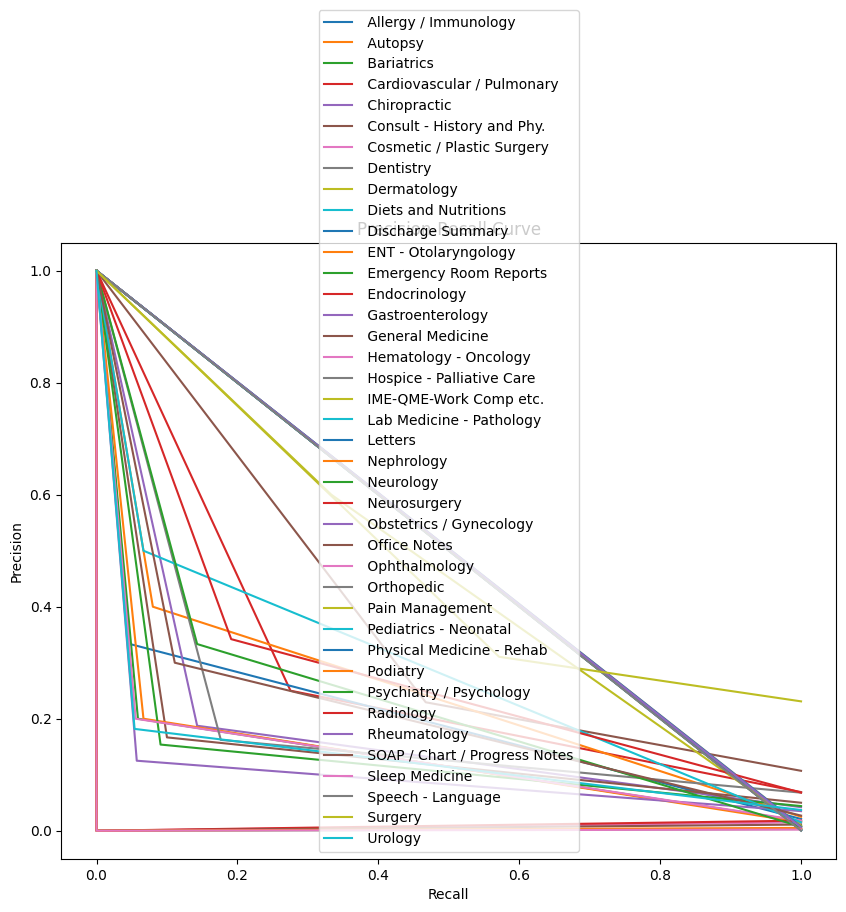

Precision-Recall Curve saved as: C:\Users\palak\Desktop\precision_recall_curve.png


In [55]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
import os

# Compute precision-recall curve for each class
precision = dict()
recall = dict()
for i, specialty in enumerate(target_names):
    precision[i], recall[i], _ = precision_recall_curve(y_test == specialty, y_pred == specialty)

# Create Precision-Recall curve plot
plt.figure(figsize=(10, 8))
for i, specialty in enumerate(target_names):
    plt.plot(recall[i], precision[i], label=f'{specialty}')

# Set axis labels and title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='best')

# Save the Precision-Recall curve image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "precision_recall_curve.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Precision-Recall Curve saved as: {desktop_path}")


In [62]:
import numpy as np
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_tfidf, y_train, cv=5)  # Adjust cv value as needed
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-Validation Scores: [0.29125    0.29       0.2375     0.29125    0.27784731]
Mean CV Score: 0.27756946182728415


C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_split.py:725: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\palak\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


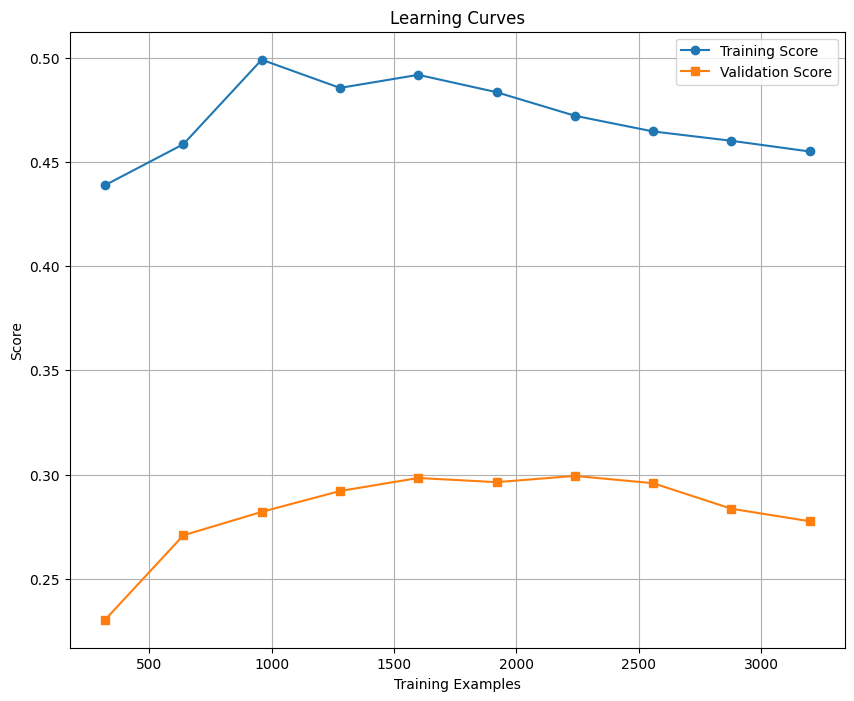

Learning Curve saved as: C:\Users\palak\Desktop\learning_curve.png


In [56]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
import os

# Generate learning curves
train_sizes, train_scores, val_scores = learning_curve(model, X_train_tfidf, y_train, cv=5, 
                                                       train_sizes=np.linspace(0.1, 1.0, 10))

# Create Learning Curves plot
plt.figure(figsize=(10, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', marker='o')
plt.plot(train_sizes, np.mean(val_scores, axis=1), label='Validation Score', marker='s')

# Set labels and title
plt.xlabel('Training Examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend(loc='best')
plt.grid(True)

# Save the Learning Curves image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "learning_curve.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Learning Curve saved as: {desktop_path}")


In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Define function to plot confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting normalize=True.
    """
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], '.2f' if normalize else 'd'),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 10))  # Increase the figure size
plot_confusion_matrix(cm, classes=target_names,
                      title='Confusion matrix, without normalization')

plt.xticks(rotation=90)  # Rotate x-axis tick labels

plt.tight_layout()  # Adjust layout

# Plot normalized confusion matrix
plt.figure(figsize=(12, 10))  # Increase the figure size
plot_confusion_matrix(cm, classes=target_names, normalize=True,
                      title='Normalized confusion matrix')

plt.xticks(rotation=90)  # Rotate x-axis tick labels

plt.tight_layout()  # Adjust layout

plt.show()

NameError: name 'cm' is not defined

<Figure size 1200x1000 with 0 Axes>

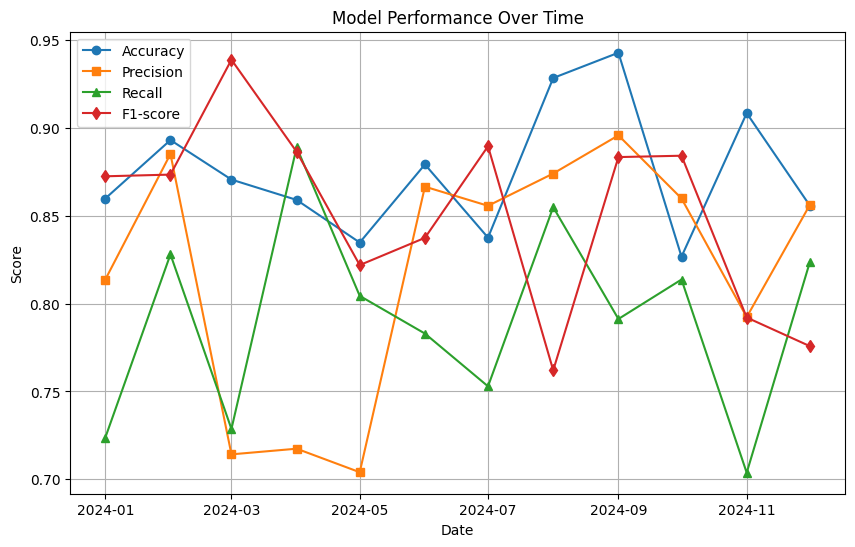

Model Performance Over Time plot saved as: C:\Users\palak\Desktop\model_performance_over_time.png


In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Generate synthetic performance data over time (replace this with actual data)
months = pd.date_range(start='2024-01-01', end='2024-12-01', freq='MS')

# Generate random performance metrics for each month
np.random.seed(0)  # For reproducibility
performance_data = {
    'Date': months,
    'Accuracy': np.random.uniform(0.75, 0.95, len(months)),
    'Precision': np.random.uniform(0.7, 0.9, len(months)),
    'Recall': np.random.uniform(0.7, 0.9, len(months)),
    'F1-score': np.random.uniform(0.75, 0.95, len(months))
}

# Create DataFrame
performance_df = pd.DataFrame(performance_data)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(performance_df['Date'], performance_df['Accuracy'], label='Accuracy', marker='o')
plt.plot(performance_df['Date'], performance_df['Precision'], label='Precision', marker='s')
plt.plot(performance_df['Date'], performance_df['Recall'], label='Recall', marker='^')
plt.plot(performance_df['Date'], performance_df['F1-score'], label='F1-score', marker='d')

# Set labels, title, and formatting
plt.xlabel('Date')
plt.ylabel('Score')
plt.title('Model Performance Over Time')
plt.legend()
plt.grid(True)

# Save the plot image to the desktop
desktop_path = os.path.join(os.path.expanduser("~"), "Desktop", "model_performance_over_time.png")
plt.savefig(desktop_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Model Performance Over Time plot saved as: {desktop_path}")


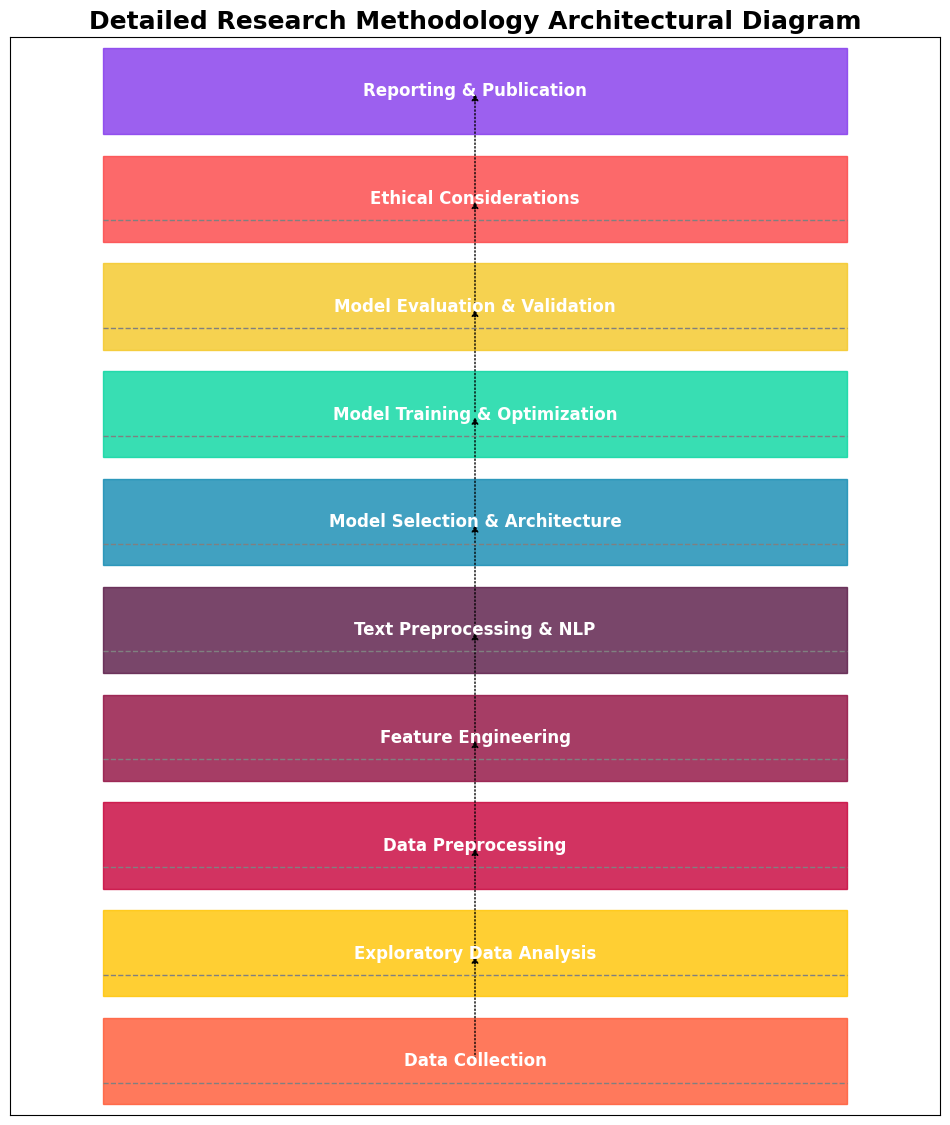

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Rectangle

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 14))

# Define components and their positions
components = [
    ('Data Collection', 0.5),
    ('Exploratory Data Analysis', 1.5),
    ('Data Preprocessing', 2.5),
    ('Feature Engineering', 3.5),
    ('Text Preprocessing & NLP', 4.5),
    ('Model Selection & Architecture', 5.5),
    ('Model Training & Optimization', 6.5),
    ('Model Evaluation & Validation', 7.5),
    ('Ethical Considerations', 8.5),
    ('Reporting & Publication', 9.5)
]

# Define colors and font styles
colors = ['#FF5733', '#FFC300', '#C70039', '#900C3F', '#581845', '#118AB2', '#06D6A0', '#F4C724', '#FC4445', '#8338EC']
font_style = {'fontsize': 12, 'fontweight': 'bold'}

# Draw rectangles representing different components with creative styles
for idx, (component, y_pos) in enumerate(components):
    ax.add_patch(Rectangle((0.1, y_pos-0.4), 0.8, 0.8, color=colors[idx], alpha=0.8))
    ax.text(0.5, y_pos, component, ha='center', va='center', color='white', **font_style)

# Define the connections between components
connections = [
    ('Data Collection', 'Exploratory Data Analysis'),
    ('Exploratory Data Analysis', 'Data Preprocessing'),
    ('Data Preprocessing', 'Feature Engineering'),
    ('Feature Engineering', 'Text Preprocessing & NLP'),
    ('Text Preprocessing & NLP', 'Model Selection & Architecture'),
    ('Model Selection & Architecture', 'Model Training & Optimization'),
    ('Model Training & Optimization', 'Model Evaluation & Validation'),
    ('Model Evaluation & Validation', 'Ethical Considerations'),
    ('Ethical Considerations', 'Reporting & Publication')
]

# Add arrows between connected components
for src, dst in connections:
    src_idx = [idx for idx, (component, _) in enumerate(components) if component == src][0]
    dst_idx = [idx for idx, (component, _) in enumerate(components) if component == dst][0]
    src_x = 0.5
    src_y = components[src_idx][1]
    dst_x = 0.5
    dst_y = components[dst_idx][1]
    arrow = FancyArrowPatch((src_x, src_y), (dst_x, dst_y), 
                            arrowstyle='-|>', mutation_scale=10, color='black', linestyle='dotted')
    ax.add_patch(arrow)

# Add hierarchical levels with dashed lines
for i in range(len(components)-1):
    level_line = plt.Line2D([0.1, 0.9], [components[i][1]-0.2, components[i][1]-0.2], color='grey', linestyle='--', linewidth=1)
    ax.add_line(level_line)

# Add labels and title
ax.set_xlim(0, 1)
ax.set_ylim(0, 10)
ax.set_xticks([])
ax.set_yticks([])
ax.set_title('Detailed Research Methodology Architectural Diagram', fontsize=18, fontweight='bold')

# Show the diagram
plt.show()
